In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold

# Бустинг

Рассматрим задачу регрессии с квадратичной функцией потерь (MSE):

$L(y, x) = \frac{1}{N} \sum (y_i - a(x_i))^2 \to \min$


Будем строить композицию из K базовых алгоритмов
$a(x) = a_K(x) = b_1(x) + \cdots + b_K(x)$

Предсказание 1 модели на j-ом объекте на 5 больше, чем нужно.
$y_j = b_1(x_j) - 5$

Обучим вторую модель предсказывать ошибки первой модели
$b_1(x_j) + b_2(x_j) = (y_j + 5) + (-5) = y_j$


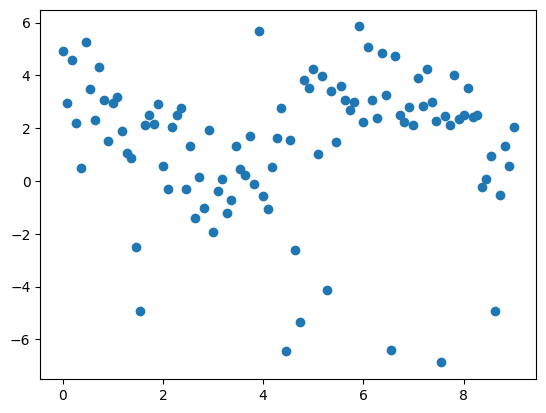

In [ ]:
X = np.linspace(0, 9, 100)
y = 2 * np.cos(X) + 4 * np.random.rand(*X.shape)

ridx = np.random.randint(0, len(X), 15)
y_true_at_random_points = y[ridx].copy()
y[ridx] = np.random.rand(len(ridx)) * 15 - 7.5

X = X.reshape(-1, 1)

plt.scatter(X.ravel(), y)

In [ ]:
model_1 = DecisionTreeRegressor(max_depth=1, random_state=42)
model_1.fit(X, y)
pred1 = model_1.predict(X)

In [ ]:
pred1

array([0.97021001, 0.97021001, 0.97021001, 0.97021001, 0.97021001,
       0.97021001, 0.97021001, 0.97021001, 0.97021001, 0.97021001,
       0.97021001, 0.97021001, 0.97021001, 0.97021001, 0.97021001,
       0.97021001, 0.97021001, 0.97021001, 0.97021001, 0.97021001,
       0.97021001, 0.97021001, 0.97021001, 0.97021001, 0.97021001,
       0.97021001, 0.97021001, 0.97021001, 0.97021001, 0.97021001,
       0.97021001, 0.97021001, 0.97021001, 0.97021001, 0.97021001,
       0.97021001, 0.97021001, 0.97021001, 0.97021001, 0.97021001,
       0.97021001, 0.97021001, 0.97021001, 0.97021001, 0.97021001,
       0.97021001, 0.97021001, 0.97021001, 0.97021001, 0.97021001,
       0.97021001, 0.97021001, 0.97021001, 0.97021001, 0.97021001,
       0.97021001, 0.97021001, 0.97021001, 0.97021001, 0.97021001,
       0.97021001, 0.97021001, 0.97021001, 2.55632362, 2.55632362,
       2.55632362, 2.55632362, 2.55632362, 2.55632362, 2.55632362,
       2.55632362, 2.55632362, 2.55632362, 2.55632362, 2.55632

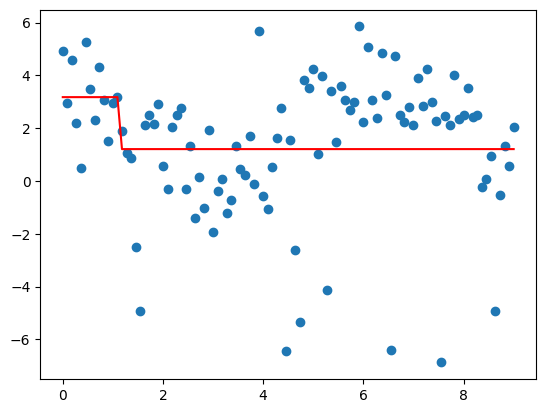

In [ ]:
plt.scatter(X, y)
plt.plot(X, pred1, c="r")

In [ ]:
y1 = (y - pred1)
y1

array([ 1.42308546,  3.46097588,  1.58640113,  1.11920066,  1.04308917,
        1.02041545,  2.26794928,  2.63872064,  0.74906097,  3.5773654 ,
        0.87007514,  3.80752298,  0.49400057,  3.4362344 ,  1.6586009 ,
        2.22258126, -0.6326218 , -5.01205249, -0.7605559 ,  1.09991162,
        1.76908218,  0.36333531,  2.18386218, -0.42963629,  2.94697957,
       -0.98969705, -2.04665017, -0.35493318, -0.22891924, -2.18914475,
        0.71776242, -2.19041233, -0.82676005,  0.62247907, -2.30062258,
       -1.52932863, -0.32497313, -0.69242367, -0.97599423,  0.27908181,
       -5.26531912, -6.13377231, -1.60077942, -7.87922985,  1.14045745,
       -0.57382506,  1.75644823, -1.6925175 , -1.5676214 ,  0.09478867,
        1.50853162,  2.64825677,  1.64665434,  2.70900835,  1.01551697,
       -0.37144603, -0.12244314,  1.63931391,  1.26279994, -4.1867703 ,
        3.73433633, -5.94980459, -3.68563183,  1.4001266 , -0.12206132,
        3.1070754 ,  3.25834176,  1.56241017,  2.96704711,  1.83

Обучим новое дерево на тех же признаках, но таргетом будет ошибка предыдущего алгоритма

In [ ]:
model_2 = DecisionTreeRegressor(max_depth=1)
model_2.fit(X, y1)
pred2 = model_2.predict(X)

In [ ]:
pred2

array([ 1.96095496,  1.96095496,  1.96095496,  1.96095496,  1.96095496,
        1.96095496,  1.96095496,  1.96095496,  1.96095496,  1.96095496,
        1.96095496,  1.96095496,  1.96095496,  1.96095496,  1.96095496,
        1.96095496, -0.37351523, -0.37351523, -0.37351523, -0.37351523,
       -0.37351523, -0.37351523, -0.37351523, -0.37351523, -0.37351523,
       -0.37351523, -0.37351523, -0.37351523, -0.37351523, -0.37351523,
       -0.37351523, -0.37351523, -0.37351523, -0.37351523, -0.37351523,
       -0.37351523, -0.37351523, -0.37351523, -0.37351523, -0.37351523,
       -0.37351523, -0.37351523, -0.37351523, -0.37351523, -0.37351523,
       -0.37351523, -0.37351523, -0.37351523, -0.37351523, -0.37351523,
       -0.37351523, -0.37351523, -0.37351523, -0.37351523, -0.37351523,
       -0.37351523, -0.37351523, -0.37351523, -0.37351523, -0.37351523,
       -0.37351523, -0.37351523, -0.37351523, -0.37351523, -0.37351523,
       -0.37351523, -0.37351523, -0.37351523, -0.37351523, -0.37

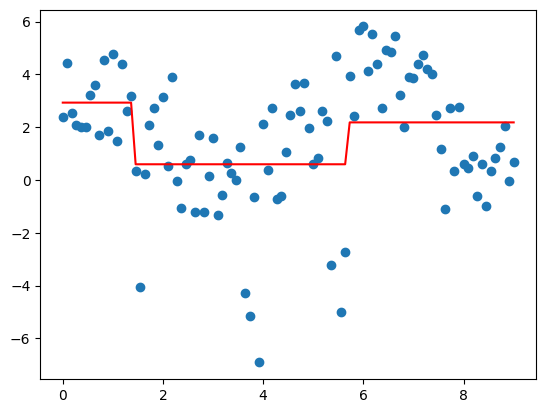

In [ ]:
plt.scatter(X, y)
plt.plot(X, pred1 + pred2, c="r")

In [ ]:
y2 = (y1 - pred2)
y2

array([-5.37869494e-01,  1.50002093e+00, -3.74553822e-01, -8.41754298e-01,
       -9.17865784e-01, -9.40539510e-01,  3.06994320e-01,  6.77765687e-01,
       -1.21189399e+00,  1.61641045e+00, -1.09087982e+00,  1.84656802e+00,
       -1.46695439e+00,  1.47527945e+00, -3.02354056e-01,  2.61626303e-01,
       -2.59106569e-01, -4.63853726e+00, -3.87040670e-01,  1.47342685e+00,
        2.14259741e+00,  7.36850544e-01,  2.55737741e+00, -5.61210592e-02,
        3.32049480e+00, -6.16181815e-01, -1.67313494e+00,  1.85820493e-02,
        1.44595987e-01, -1.81562952e+00,  1.09127765e+00, -1.81689710e+00,
       -4.53244825e-01,  9.95994302e-01, -1.92710735e+00, -1.15581340e+00,
        4.85421017e-02, -3.18908439e-01, -6.02478996e-01,  6.52597040e-01,
       -4.89180389e+00, -5.76025708e+00, -1.22726419e+00, -7.50571462e+00,
        1.51397268e+00, -2.00309833e-01,  2.12996346e+00, -1.31900227e+00,
       -1.19410617e+00,  4.68303897e-01,  1.88204685e+00,  3.02177200e+00,
        2.02016957e+00,  

In [ ]:
model_3 = DecisionTreeRegressor(max_depth=1)
model_3.fit(X, y2)
pred3 = model_3.predict(X)

In [ ]:
pred3

array([ 0.30301686,  0.30301686,  0.30301686,  0.30301686,  0.30301686,
        0.30301686,  0.30301686,  0.30301686,  0.30301686,  0.30301686,
        0.30301686,  0.30301686,  0.30301686,  0.30301686,  0.30301686,
        0.30301686,  0.30301686,  0.30301686,  0.30301686,  0.30301686,
        0.30301686,  0.30301686,  0.30301686,  0.30301686,  0.30301686,
        0.30301686,  0.30301686,  0.30301686,  0.30301686,  0.30301686,
        0.30301686,  0.30301686,  0.30301686,  0.30301686,  0.30301686,
        0.30301686,  0.30301686,  0.30301686,  0.30301686,  0.30301686,
        0.30301686,  0.30301686,  0.30301686,  0.30301686,  0.30301686,
        0.30301686,  0.30301686,  0.30301686,  0.30301686,  0.30301686,
        0.30301686,  0.30301686,  0.30301686,  0.30301686,  0.30301686,
        0.30301686,  0.30301686,  0.30301686,  0.30301686,  0.30301686,
        0.30301686,  0.30301686,  0.30301686,  0.30301686,  0.30301686,
        0.30301686,  0.30301686,  0.30301686,  0.30301686,  0.30

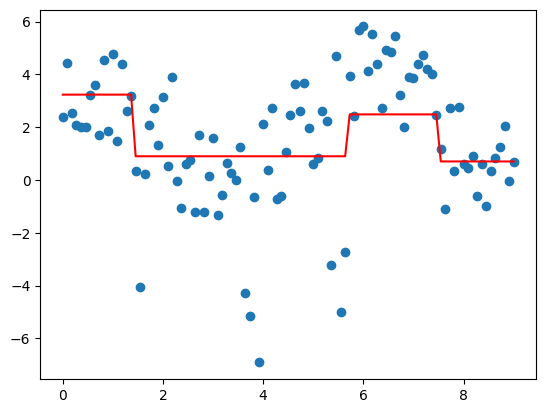

In [ ]:
plt.scatter(X, y)
plt.plot(X, pred1 + pred2 + pred3, c="r")

In [ ]:
y3 = y2 - pred3
y3

array([-8.40886352e-01,  1.19700407e+00, -6.77570680e-01, -1.14477116e+00,
       -1.22088264e+00, -1.24355637e+00,  3.97746238e-03,  3.74748829e-01,
       -1.51491084e+00,  1.31339359e+00, -1.39389667e+00,  1.54355116e+00,
       -1.76997125e+00,  1.17226259e+00, -6.05370914e-01, -4.13905544e-02,
       -5.62123426e-01, -4.94155412e+00, -6.90057528e-01,  1.17040999e+00,
        1.83958055e+00,  4.33833687e-01,  2.25436055e+00, -3.59137917e-01,
        3.01747794e+00, -9.19198673e-01, -1.97615180e+00, -2.84434808e-01,
       -1.58420871e-01, -2.11864637e+00,  7.88260788e-01, -2.11991396e+00,
       -7.56261683e-01,  6.92977444e-01, -2.23012420e+00, -1.45883026e+00,
       -2.54474756e-01, -6.21925297e-01, -9.05495853e-01,  3.49580183e-01,
       -5.19482075e+00, -6.06327394e+00, -1.53028104e+00, -7.80873147e+00,
        1.21095583e+00, -5.03326691e-01,  1.82694660e+00, -1.62201913e+00,
       -1.49712303e+00,  1.65287040e-01,  1.57902999e+00,  2.71875514e+00,
        1.71715271e+00,  

In [ ]:
model_4 = DecisionTreeRegressor(max_depth=1)
model_4.fit(X, y3)
pred4 = model_4.predict(X)

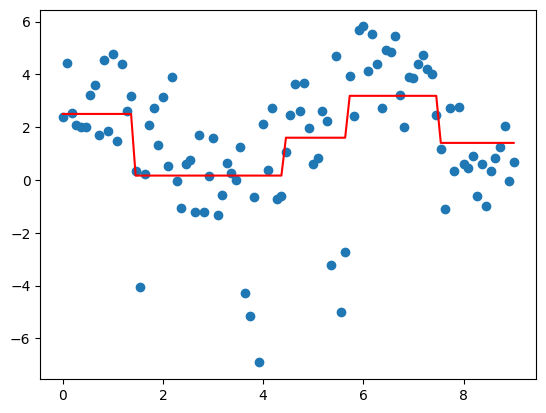

In [ ]:
plt.scatter(X, y)
plt.plot(X, pred1 + pred2 + pred3 + pred4, c="r")

In [ ]:
y4 = y3 - pred4
y4

array([-0.10945342,  1.928437  ,  0.05386225, -0.41333822, -0.48944971,
       -0.51212343,  0.7354104 ,  1.10618176, -0.78347791,  2.04482652,
       -0.66246374,  2.2749841 , -1.03853831,  1.90369552,  0.12606202,
        0.69004238,  0.16930951, -4.21012118,  0.04137541,  1.90184292,
        2.57101349,  1.16526662,  2.98579348,  0.37229502,  3.74891088,
       -0.18776574, -1.24471886,  0.44699812,  0.57301206, -1.38721344,
        1.51969372, -1.38848102, -0.02482875,  1.42441038, -1.49869127,
       -0.72739733,  0.47695818,  0.10950764, -0.17406292,  1.08101312,
       -4.46338781, -5.33184101, -0.79884811, -7.07729854,  1.94238876,
        0.22810624,  2.55837954, -0.89058619, -0.76569009, -0.53746225,
        0.8762807 ,  2.01600585,  1.01440342,  2.07675743,  0.38326605,
       -1.00369695, -0.75469406,  1.00706299,  0.63054902, -4.81902121,
        3.10208542, -6.58205551, -4.31788275,  0.76787568, -0.75431224,
        2.47482448,  2.62609085,  0.93015925,  2.33479619,  1.20

In [ ]:
model_5 = DecisionTreeRegressor(max_depth=1)
model_5.fit(X, y4)
pred5 = model_5.predict(X)

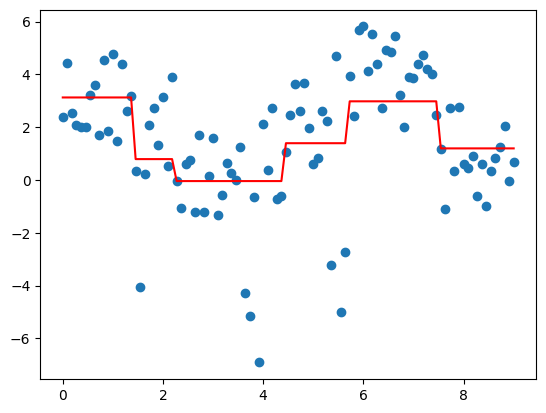

In [ ]:
plt.scatter(X, y)
plt.plot(X, pred1 + pred2 + pred3 + pred4 + pred5, c="r")

**Почему же бустинг градиентый?**.

Функция потерь:  
$L(y, x) = \frac{1}{N} \sum (y_i - a(x_i))^2 \to \min $

Строим композицию из K базовых алгоритмов
$a(x) = a_K(x) = b_1(x) + \cdots + b_K(x)$

Строим 1 модель:
$b_1(x) = \arg\min (L(y, b(x)))$

Ошибки 1 модели:
$s^1 = y_i - b_1(x_i)$

Строим 2 модель:
$b_2(x) = \arg\min (L(s^1, b(x)))$

Для k объекта:
$s_i^k = y_i - b_k(x_i) = -\nabla L(y_i, b_k(x_i))$



# над разными моделями

При помощи функции `plot_boosting_results()` можно визуализировать решающие поверхности композиции, очередной базовой модели и остатки при добавлении базовых моделей.

 в качестве базовой модели использовать:
- решающее дерево
- линейную регрессию
- `kNN`-регрессор
- `SVR`.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
def plot_boosting_results(base_estimator, n_estimators, X, y):
    fig, ax = plt.subplots(n_estimators, 3, figsize=(20, n_estimators * 5))

    # Остатки
    resid = []
    resid.append(y)

    # Предсказания моделей
    y_pred = []

    for i in range(n_estimators):
        # Обучение очередной базовой модели
        base_estimator.fit(X, resid[-1])

        # Предсказание базовой модели
        y_pred.append(base_estimator.predict(X))

        # Вычисление предсказания композиции
        a = np.sum(y_pred, axis=0)

        # Вычисление остатка
        resid.append(y - a)

        # Предсказания композиции
        ax[i, 0].scatter(X, y, label="Обучающая выборка", alpha=0.7)
        ax[i, 0].plot(X, a, c="red", lw=3, label="Число деревьев: " + str(i + 1))
        ax[i, 0].set_title("MSE: " + str(mean_squared_error(y, a)))

        # Предсказания очередной модели
        ax[i, 1].scatter(X, y, label="Обучающая выборка", alpha=0.7)
        ax[i, 1].plot(X, y_pred[-1], c="red", lw=3)
        ax[i, 1].set_title("Предсказания модели " + str(i + 1))

        ax[i, 2].scatter(X, resid[-1], alpha=0.7, marker="v", c="orange")
        ax[i, 2].set_title("Остатки")

        ax[i, 0].legend()

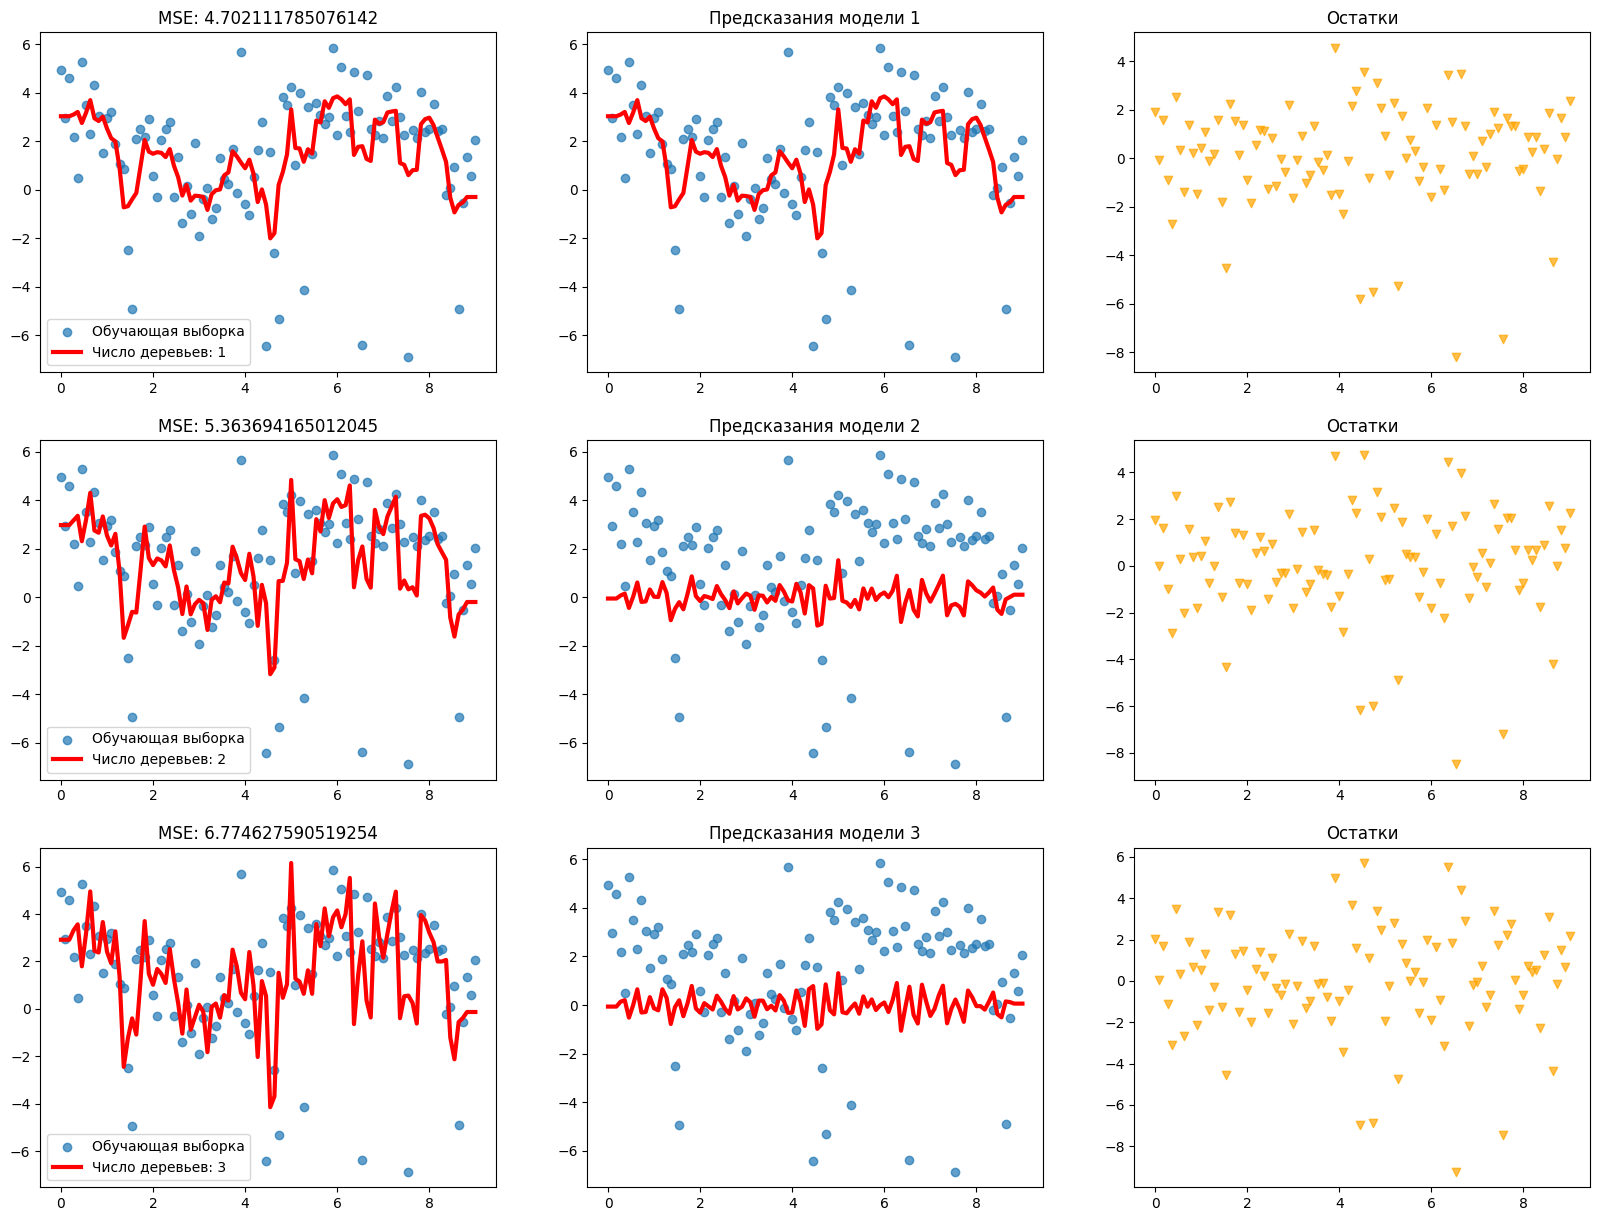

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# DecisionTreeRegressor(max_depth=1)
plot_boosting_results(KNeighborsRegressor(), n_estimators=3, X=X, y=y)

# Градиентный бустинг

Заметим, что в примере выше использование остатков как меры ошибки модели было оправданным, так как остатки непосредственно участвуют в расчёте $MSE$. Попробуем обобщить идею использования остатков на произвольную функцию потерь.

Будем решать ту же задачу, что и выше, но с использованием произвольной функции потерь $L(\cdot)$. Предположим, что каким-то образом мы уже обучили $N$ базовых моделей и построили композицию $a^{(N)}(X)$. Как построить $(N+1)$-ю базовую модель?

Заметим, что мы хотим выбрать $(N+1)$-ую базовую модель так, чтобы как можно сильнее уменьшить ошибку:

$$
\dfrac{1}{\ell}\sum_{i = 1}^{\ell} L[y_i, a^{N}(x_i) + b^{(N+1)}(x_i)] \to \min_{b^{(N+1)}},
$$

где $b^{(N+1)}(x_i)$ – предсказания новой базовой модели. Теперь заметим, что так как и $y_i$, и $a^{N}(x_i)$ фиксированы (обсуждали выше), то в сущности нам нужно найти числа $b^{(N+1)}(x_i) = s_i^{(N)}$, которые сильнее всего уменьшили бы функцию потерь:


$$
\dfrac{1}{\ell}\sum_{i = 1}^{\ell} L[y_i, a^{N}(x_i) + s^{(N)}_i] \to \min_{s^{(N)}_i}.
$$

**Замечание.** Заметьте, что теперь мы ищем просто числа $s^{(N)}_i$, которые сильнее всего уменьшили бы функцию.

После изучения градиентного спуска мы знаем, что вектор чисел, сильнее всего уменьшающих какую-то функцию – это антиградиент этой функции. Таким образом, в качестве чисел $s_i^{(N)}$ следует взять

$$
s_i^{(N)} = -\dfrac{\partial L(y, p)}{\partial p}
$$

в точке $p = a^{(N)}(x_i)$, то есть антиградиент функции потерь в точке ответов уже построенной композиции.

**Чек-пойнт.** Убедитесь, что вы понимаете, какие **числа**, нужно взять, чтобы решить задачу.

Итак, мы выяснили, какие числа нужно взять для уменьшения функции потерь на **обучающей выборке**. Вспомним, что мы определяли эти числа как $b^{(N+1)}(x_i) = s_i^{(N)}$, то есть ответы очередной базовой модели. Таким образом, нам нужно обучить очередную базовую модель так, чтобы она хорошо приближала антиградиент функции потерь в точке ответов уже построенной композиции – а это хорошо известная нам задача обучения с учителем. Обычно она решается путём минимизации $MSE$:

$$
b^{(N+1)}(x) = \arg\min_b \sum_{i = 1}^{\ell} (b(x_i) - s_i^{(N)})^2.
$$

**Важный момент:** заметим, что задача, описанная выше – это не изначальная задача! В этом и состоит магия градиентного бустинга: мы можем использовать любую функцию потерь, через неё вывести $s_i^{(N)}$, а затем просто решать задачу приближения при помощи $MSE$!

**Шаг 0.** Имеем пустую композицию решающих деревьев $a(X) = \{\}$.

In [ ]:
a = 0

**Шаг 1.** Обучим первое решающее дерево $DT_1$ и включим его в композицию: $a^{(1)}(X) = DT_1$. Получим предсказания композиции на обучающей выборке.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Обучение решающего дерева глубины 1 и получение предсказаний на обучающей выборке
dt1 = DecisionTreeRegressor(max_depth=1)
dt1.fit(X, y)
dt1_pred = dt1.predict(X)

# Включение предсказаний первого дерева в композицию (простым суммированием)
a = dt1_pred

# Визуализация выборки и предсказаний
plot_sample_model(
    X, y, plot_predictions=True, y_pred=a, y_pred_label="Предсказания a = DT1"
)

**Шаг 2.** В примере 1.1 на этом шаге мы рассчитывали остатки. Здесь же мы должны рассчитать антиградиент функции потерь в точке ответов уже построенной композиции.

**Задание:** вычислите градиент $MSE$

$$
L(y, p) = \dfrac{1}{2} \sum_{i = 1}^{\ell} (y_i - p_i)^2
$$

по $p_i$ в точке $p_i = a(x_i)$.

**Решение:**

$$
\dfrac{\partial L(y, p)}{\partial p_i} = -(y_i - p_i) = \{p_i = a(x_i)\} = -(y_i - a(x_i)).
$$

Таким образом, антиградиент функции потерь равен:

$$
s_i = - (-(y_i - a(x_i))) = y_i - a(x_i),
$$

то есть в точности остаток в том виде, как мы определяли выше.

Таким образом, использование градиентного бустинга, если целевая функция – $MSE$, эквивалентно процедуре расчёта остатков, как мы это делали в примере 1.1, а сами остатки совпадают с антиградиентами $s_i$!